In [3]:
import pandas_datareader.data as web
import datetime
import pandas as pd

In [19]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set()

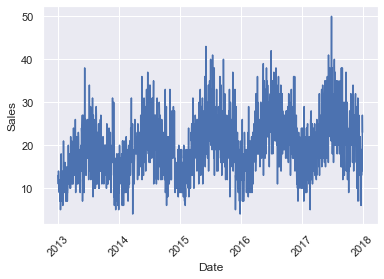

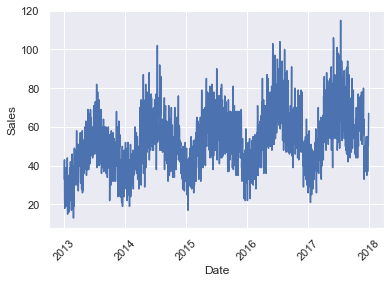

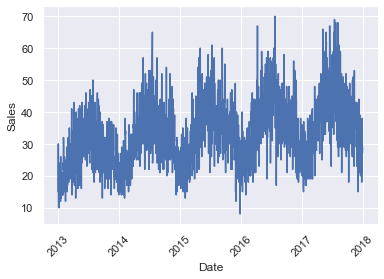

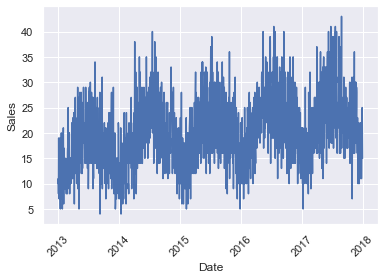

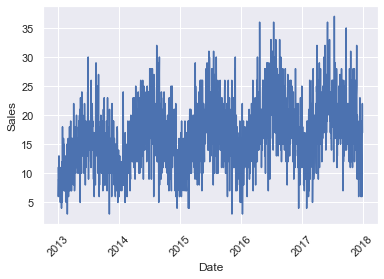

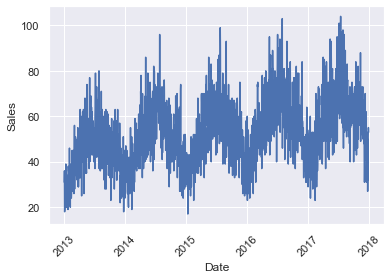

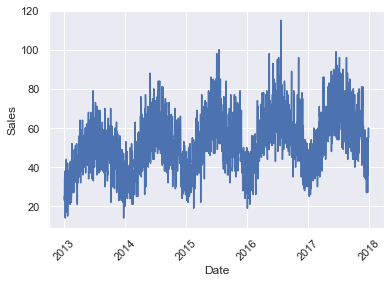

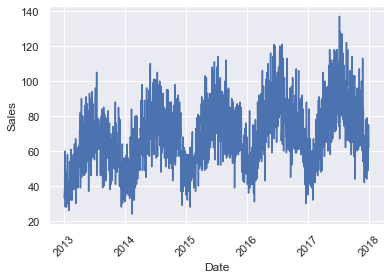

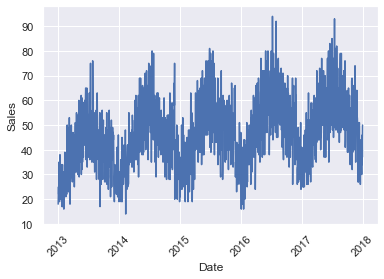

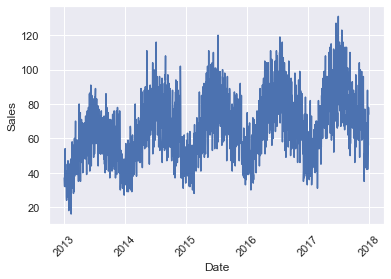

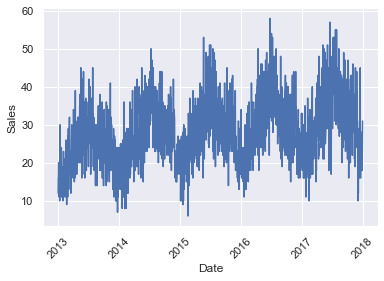

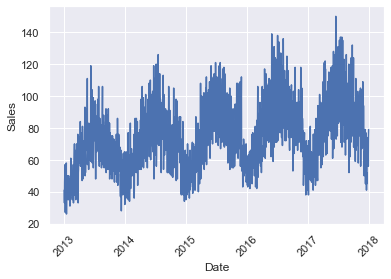

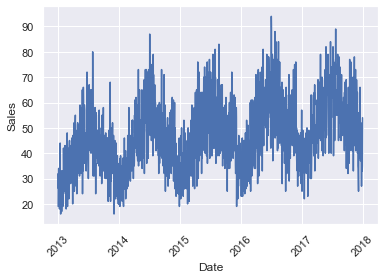

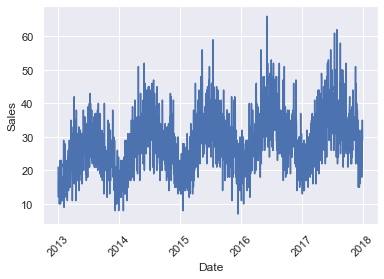

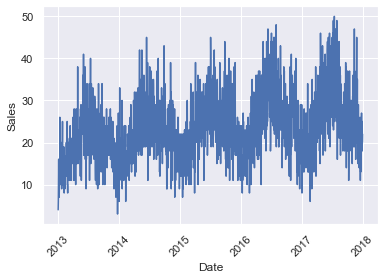

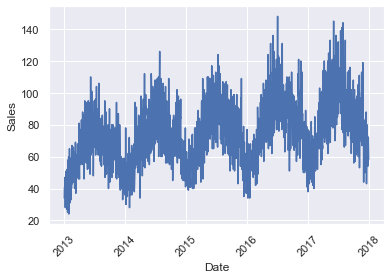

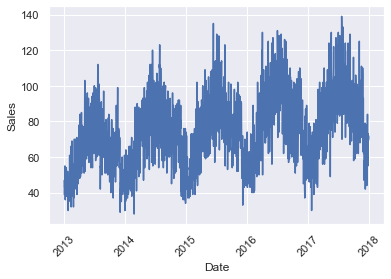

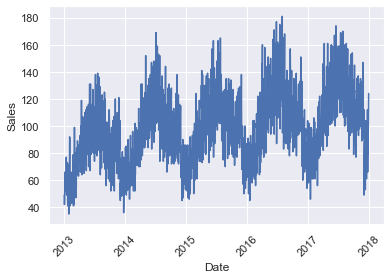

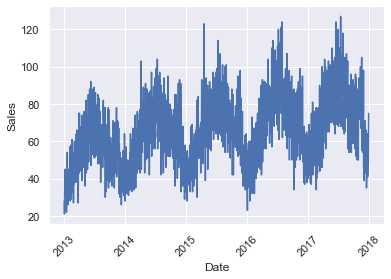

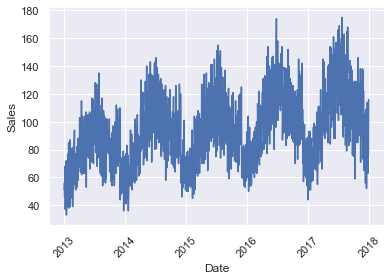

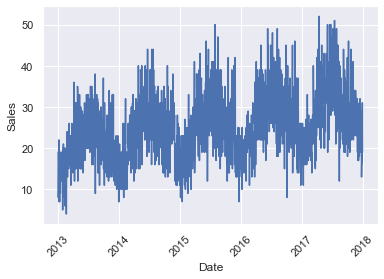

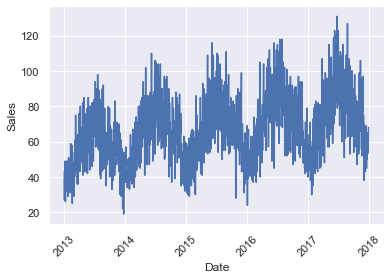

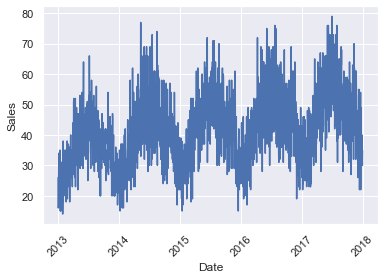

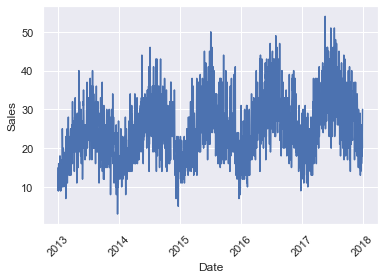

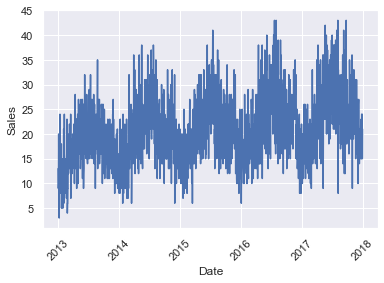

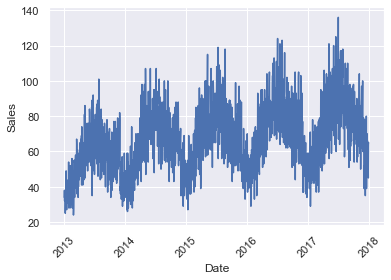

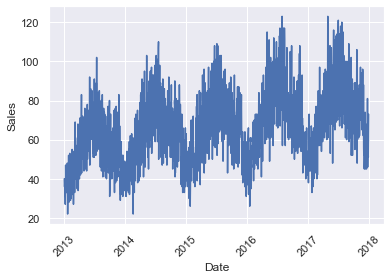

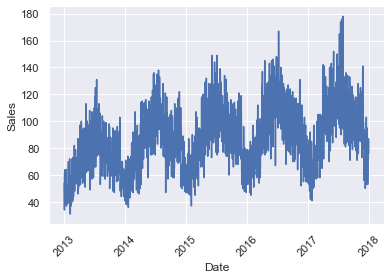

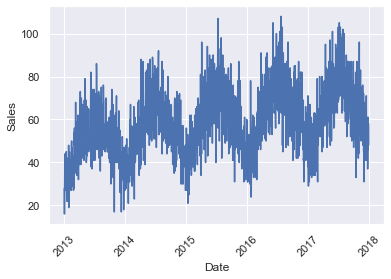

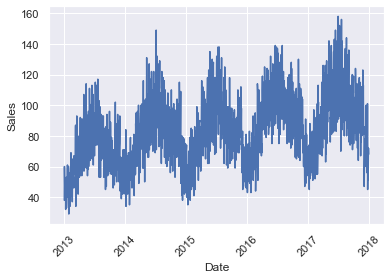

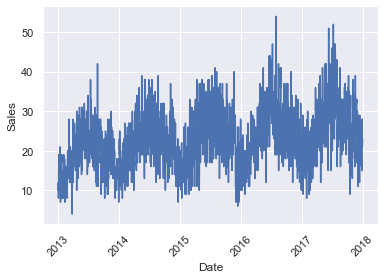

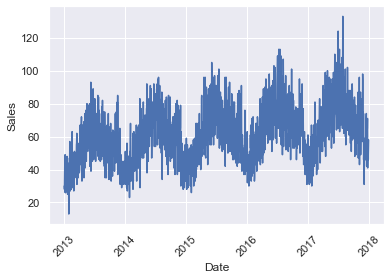

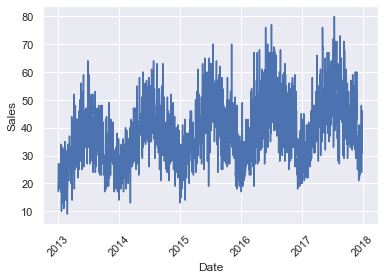

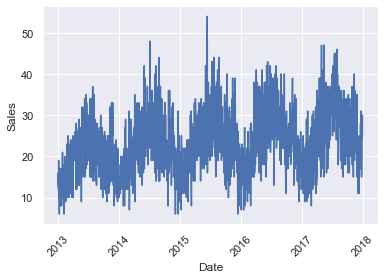

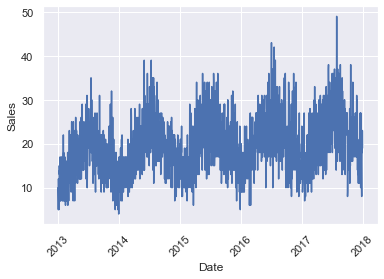

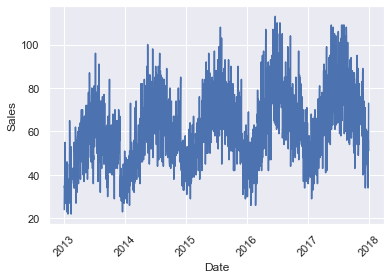

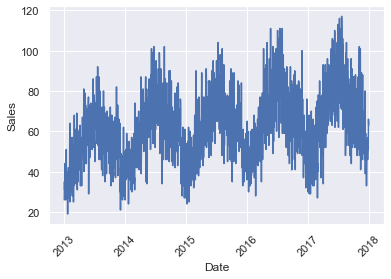

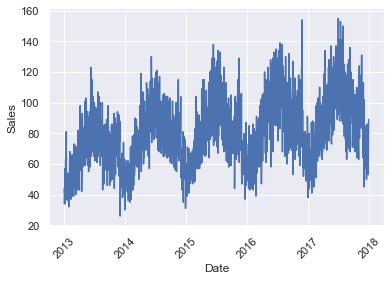

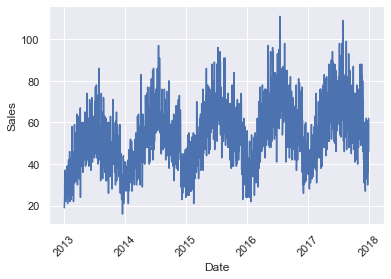

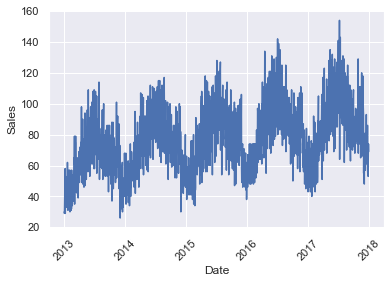

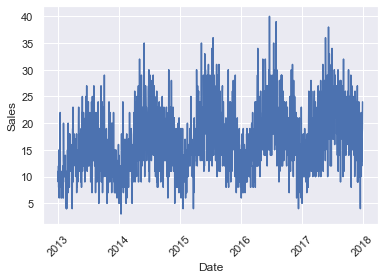

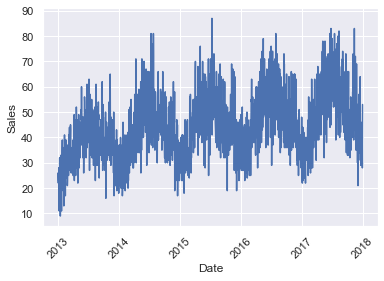

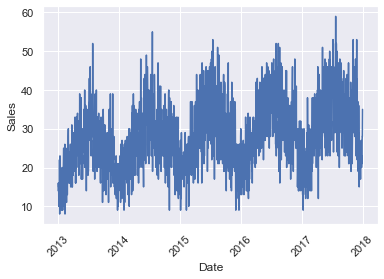

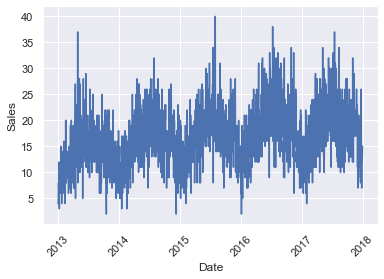

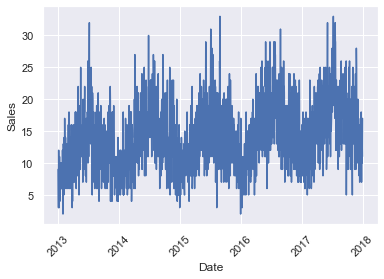

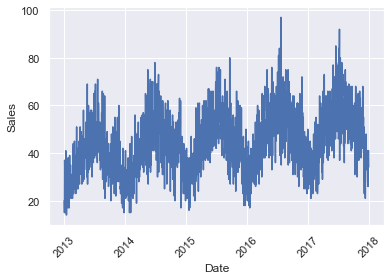

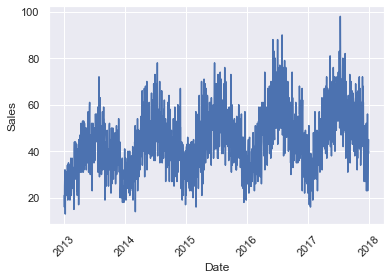

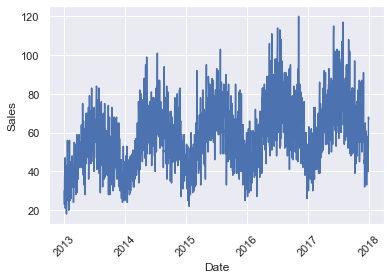

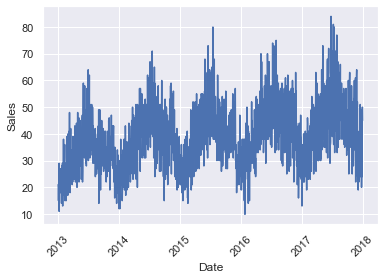

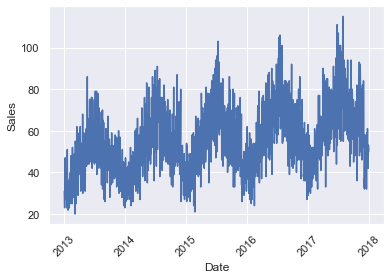

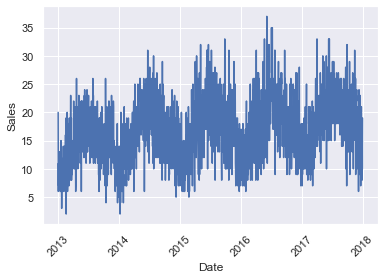

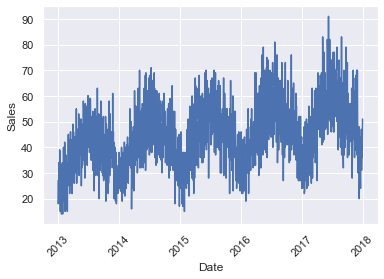

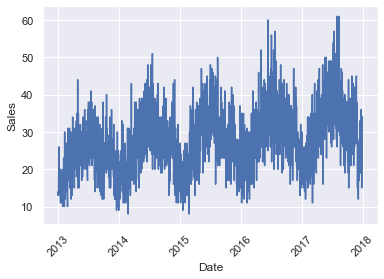

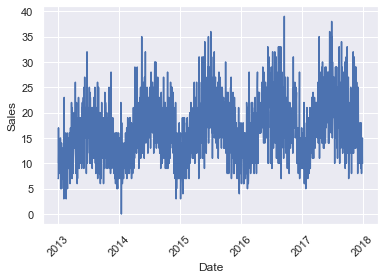

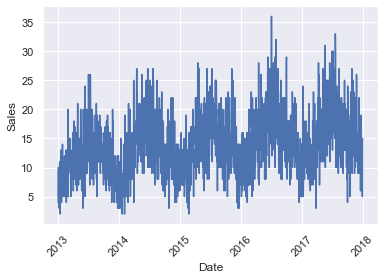

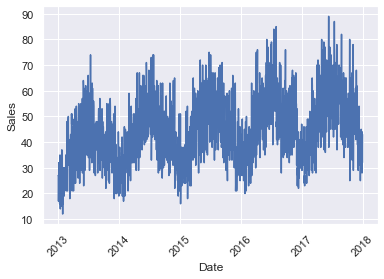

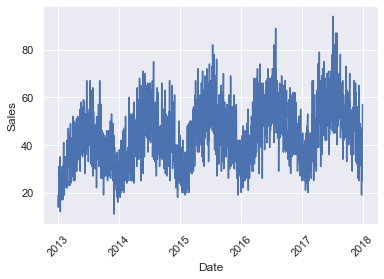

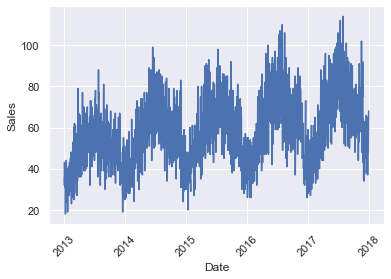

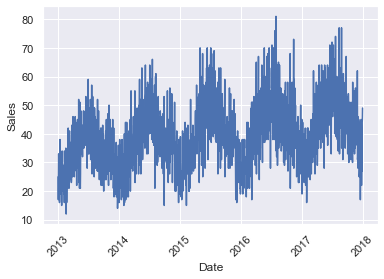

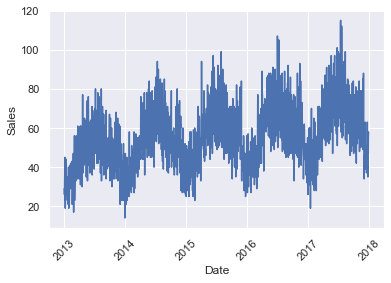

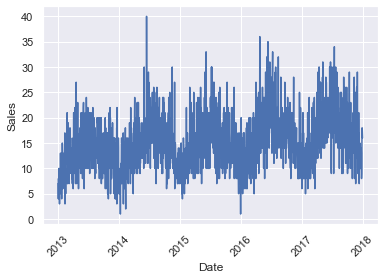

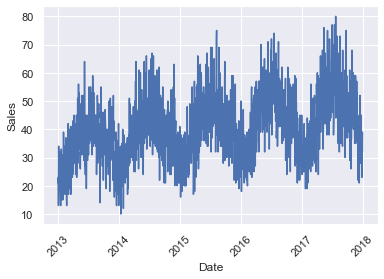

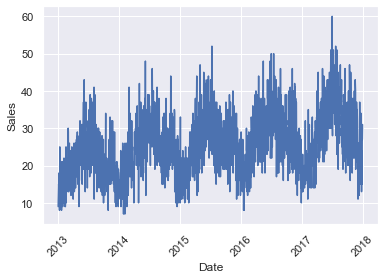

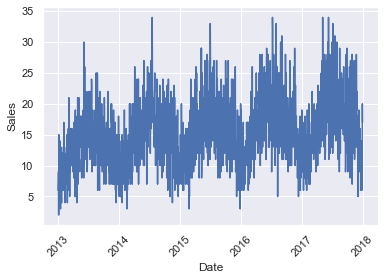

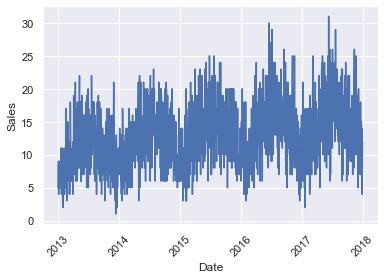

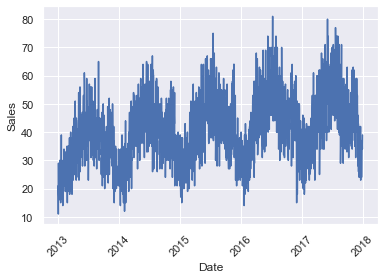

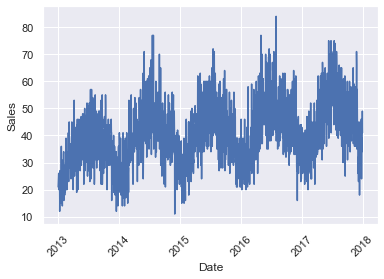

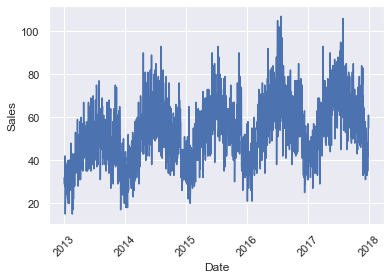

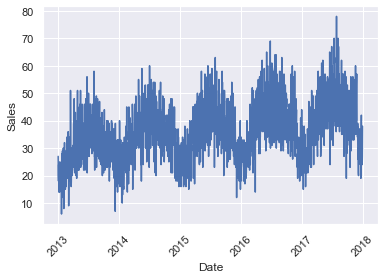

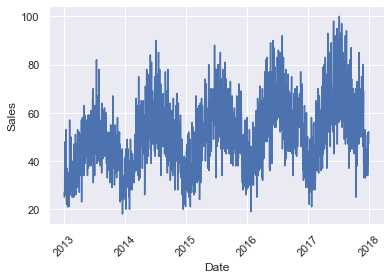

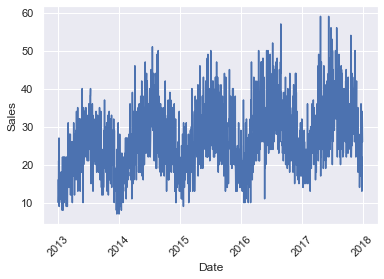

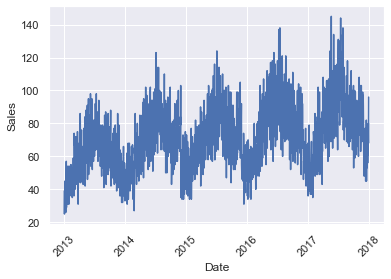

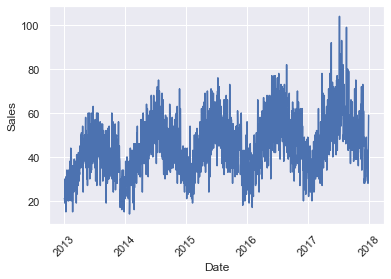

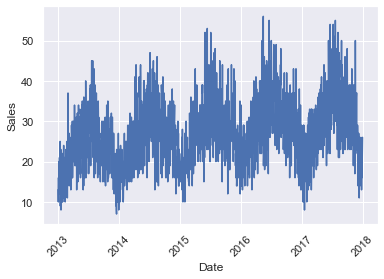

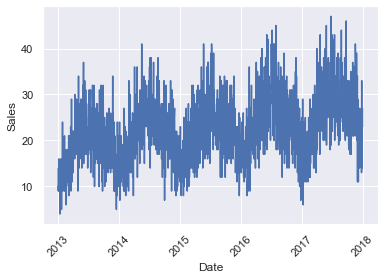

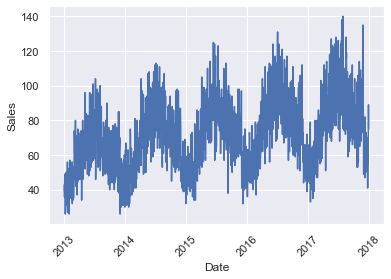

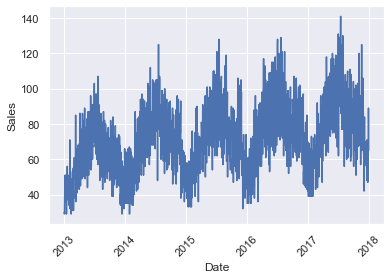

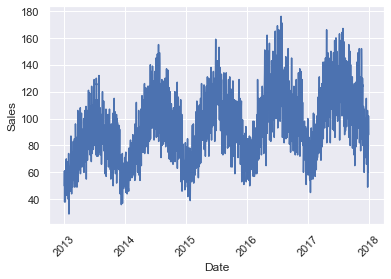

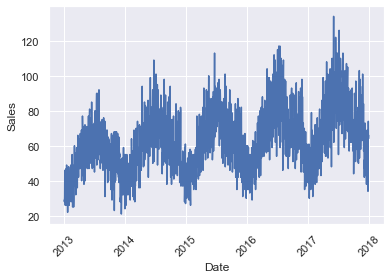

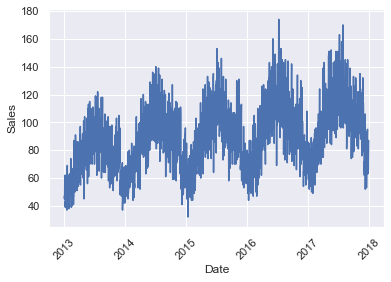

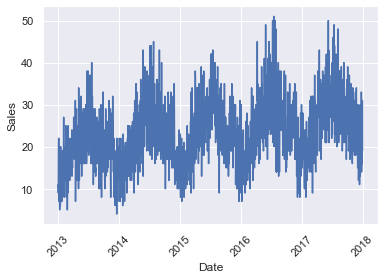

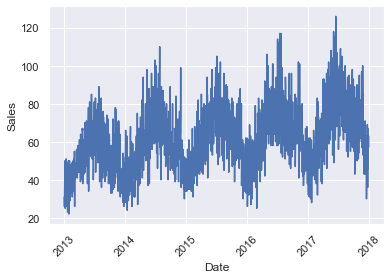

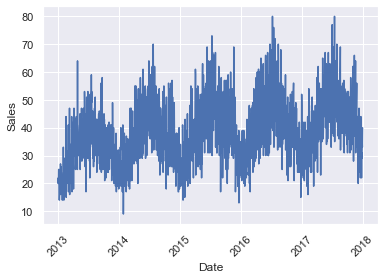

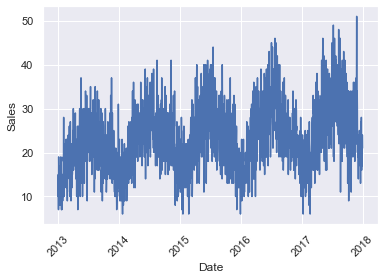

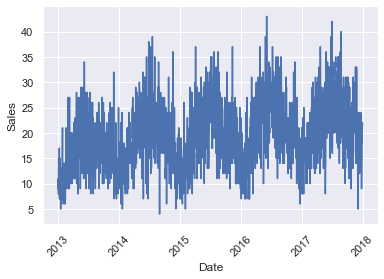

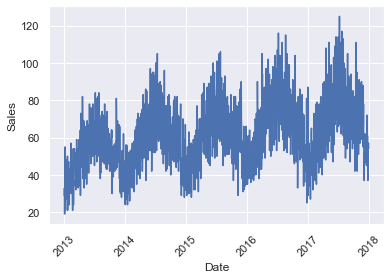

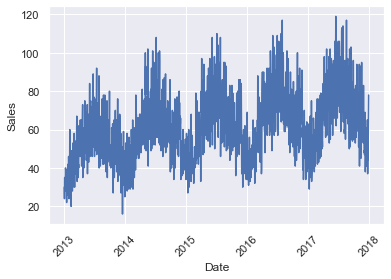

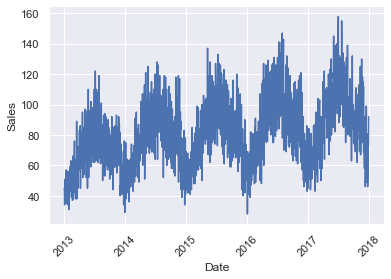

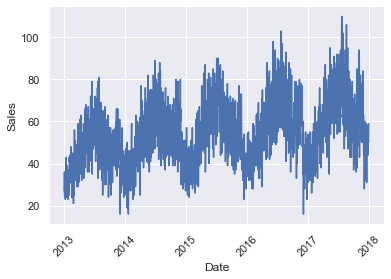

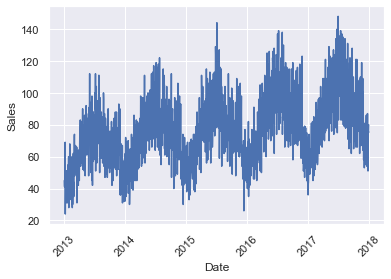

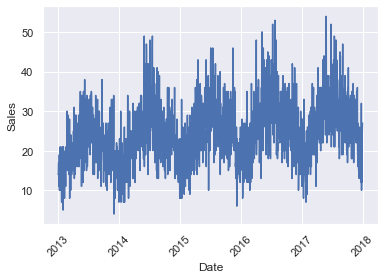

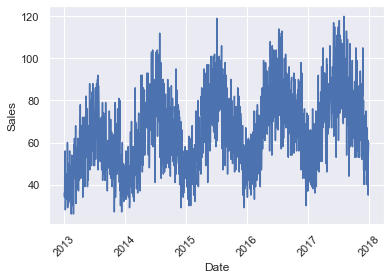

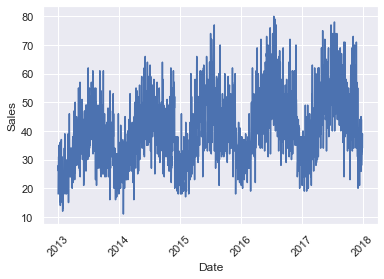

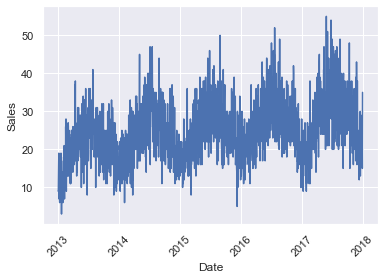

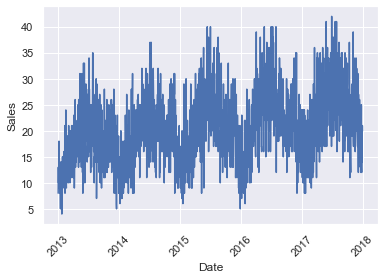

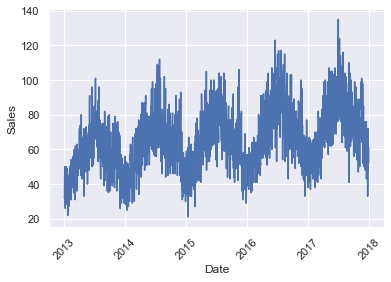

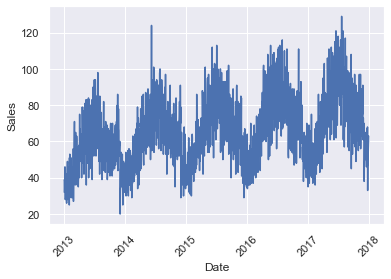

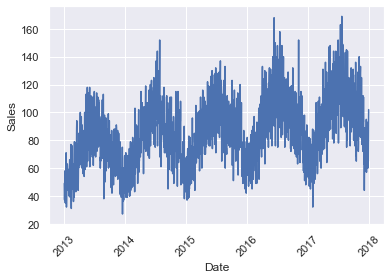

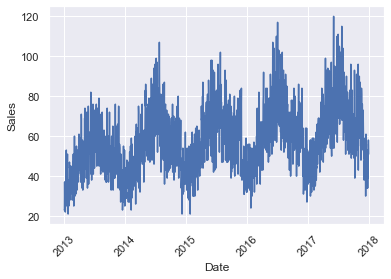

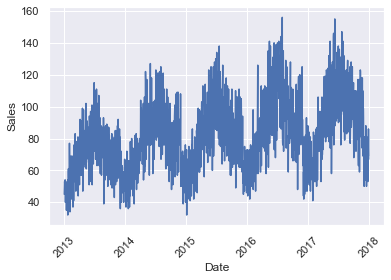

In [59]:
for i in range(10):
    for y in range(10):
        
    

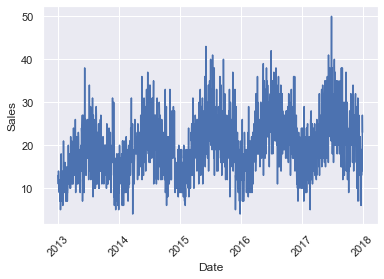

In [119]:
df = pd.read_csv('./datasets/train.csv', parse_dates=True, index_col=0)
df = df.loc[(df['store'] == 1) & (df['item'] == 1)]
df = df[['sales']]
plt.ylabel("Sales")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.plot(df.index, df['sales'])
plt.show()

In [120]:
df.head()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


In [150]:
train = df[pd.to_datetime(df.index) < pd.to_datetime("2017-10-01", format="%Y-%m-%d")]
test = df[pd.to_datetime(df.index) >= pd.to_datetime("2017-10-01", format="%Y-%m-%d")]

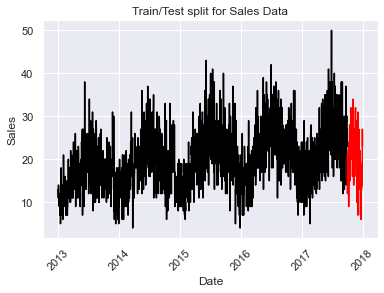

In [151]:
plt.plot(train, color='black')
plt.plot(test, color='red')
plt.ylabel("Sales")
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.show()

In [152]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [153]:
y = train['sales']

In [154]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [155]:
ARMAmodel = ARMAmodel.fit()

In [156]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df['Predictions']

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


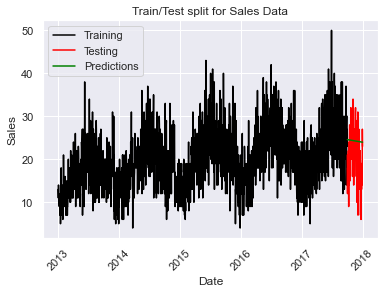

In [157]:
plt.plot(train, color='black', label= "Training")
plt.plot(test, color='red', label='Testing')
plt.plot(y_pred_out, color="green", label = "Predictions")
plt.ylabel("Sales")
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

In [158]:
import numpy as np
from sklearn.metrics import mean_squared_error
arma_rmse = np.sqrt(mean_squared_error(test["sales"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  7.060342624952724


In [147]:
from statsmodels.tsa.arima.model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq

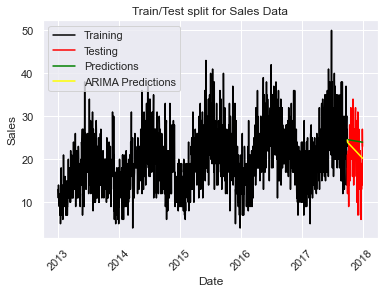

In [185]:
ARIMAmodel = ARIMA(y, order = (1, 2, 2))
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df['Predictions'] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out2 = y_pred_df["Predictions"]


plt.plot(train, color='black', label= "Training")
plt.plot(test, color='red', label='Testing')
plt.plot(y_pred_out, color="green", label = "Predictions")
plt.plot(y_pred_out2, color="Yellow", label = "ARIMA Predictions")
plt.ylabel("Sales")
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

In [186]:
import numpy as np
from sklearn.metrics import mean_squared_error
arma_rmse = np.sqrt(mean_squared_error(test["sales"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  5.985394301112346


In [195]:
SARIMAXmodel = SARIMAX(y, order = (1, 2, 2), seasonal_order=(2,2,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


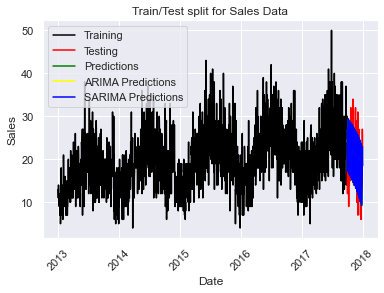

In [196]:
plt.plot(train, color='black', label= "Training")
plt.plot(test, color='red', label='Testing')
plt.plot(y_pred_out, color="green", label = "Predictions")
plt.plot(y_pred_out2, color="Yellow", label = "ARIMA Predictions")
plt.plot(y_pred_out, color="Blue", label = "SARIMA Predictions")
plt.ylabel("Sales")
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

In [197]:
import numpy as np
from sklearn.metrics import mean_squared_error
arma_rmse = np.sqrt(mean_squared_error(test["sales"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  5.27106342202998
